In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import xlwings as xw
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from ipynb.fs.full.Functions import check_adf

os.chdir(r"C:\Users\tdrown\Desktop")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Files to import
data_file = r"C:\Users\tdrown\Documents\Price Protection\Field Edge to estimate demand\hardi_master.xlsx"
hours_file = r"C:\Users\tdrown\Documents\Price Protection\Public Data\Contractor Hours.xlsx"
wages_file = r"C:\Users\tdrown\Documents\Price Protection\Public Data\Contractor Payroll.xlsx"
ahri_file = r"N:\Market Intelligence\AHRI\AHRI source data .xlsx"

In [2]:
region_map = pd.read_excel(data_file, sheet_name='Region Mapping')
df = pd.read_excel(data_file, sheet_name='All Data', usecols='A:M')
df.columns

df = df[['Date', 'State', 'Region', 'NewCustomers', 'NewInvoices',
       'InvoiceTotal', 'NewQuotes', 'QuoteTotal', 'Month', 'Year',
       'AvgInvoice', 'AvgQuote']].copy()

df = df.loc[~df['Region'].isin(['Canada', 'South America'])]
print(df.Region.unique())
print(df.State.unique())

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

new_quotes = df.pivot_table(values='NewQuotes', index='Date', columns='Region',aggfunc=np.sum)
new_quotes


['Central' 'Great Lakes' 'Northeastern' 'Mid-Atlantic' 'Southeastern'
 'Southwestern' 'Western']
['IA' 'IL' 'IN' 'KS' 'MI' 'MN' 'MO' 'ND' 'NE' 'OH' 'WI' 'SD' 'CT' 'MA'
 'ME' 'NH' 'NJ' 'NY' 'PA' 'RI' 'VT' 'AL' 'AR' 'DE' 'FL' 'GA' 'KY' 'LA'
 'MD' 'MS' 'NC' 'OK' 'SC' 'TN' 'TX' 'VA' 'WV' 'DC' 'de' 'AK' 'AZ' 'CA'
 'CO' 'ID' 'MT' 'NM' 'NV' 'OR' 'UT' 'WA' 'WY' 'HI']


Region,Central,Great Lakes,Mid-Atlantic,Northeastern,Southeastern,Southwestern,Western
Date,,,,,,,
2019-01-01,311,180,159,307,284,148,264
2019-02-01,281,146,107,287,277,131,301
2019-03-01,209,183,117,328,302,141,386
2019-04-01,333,181,148,364,371,170,463
2019-05-01,299,210,203,441,400,192,488
2019-06-01,299,178,180,356,370,162,422
2019-07-01,319,222,193,397,400,203,469
2019-08-01,244,188,171,388,367,182,440
2019-09-01,293,173,154,400,321,167,391


Index(['State', 'Region', 'NewCustomers', 'NewInvoices', 'InvoiceTotal',
       'NewQuotes', 'QuoteTotal', 'Month', 'Year', 'AvgInvoice', 'AvgQuote'],
      dtype='object')

New Customers


Central

ADF Test:
ADF Statistic:-3.5509861255469564
p-value:0.006770242796526519
No. of Lags Used:0
Number of Obs:50
Reject null hypothesis and data is stationary

Great Lakes

ADF Test:
ADF Statistic:-3.8109755290701948
p-value:0.002796996163452951
No. of Lags Used:0
Number of Obs:50
Reject null hypothesis and data is stationary

Mid-Atlantic

ADF Test:
ADF Statistic:-3.5673608794465905
p-value:0.00641656551034051
No. of Lags Used:0
Number of Obs:50
Reject null hypothesis and data is stationary

Northeastern

ADF Test:
ADF Statistic:-5.643754402883778
p-value:1.0224479591518518e-06
No. of Lags Used:3
Number of Obs:47
Reject null hypothesis and data is stationary

Southeastern

ADF Test:
ADF Statistic:-3.7221489132767043
p-value:0.003812179040022416
No. of Lags Used:5
Number of Obs:45
Reject null h

<AxesSubplot:xlabel='Date'>

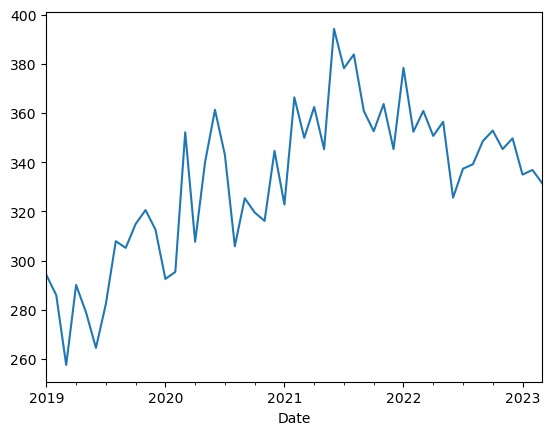

In [3]:
print(df.columns)
newcust = df.pivot_table(values='NewCustomers', index='Date', columns='Region',aggfunc=np.sum)
newinv = df.pivot_table(values='NewInvoices', index='Date', columns='Region',aggfunc=np.sum)
invtotal = df.pivot_table(values='InvoiceTotal', index='Date', columns='Region',aggfunc=np.sum)
newquote = df.pivot_table(values='NewQuotes', index='Date', columns='Region',aggfunc=np.sum)
quotetotal = df.pivot_table(values='QuoteTotal', index='Date', columns='Region',aggfunc=np.sum)
avginv = df.pivot_table(values='AvgInvoice', index='Date', columns='Region', aggfunc=np.mean)
avgquote = df.pivot_table(values='AvgQuote', index='Date', columns='Region', aggfunc=np.mean)

df_list = [newcust, newinv, invtotal, newquote, quotetotal, avginv, avgquote]
print_list = ['New Customers', 'New Invoices', 'Invoice Total', 'New Quotes', 'Quote Total', 'Average Invoice', 'Avg Quote']
l=0
for dd in df_list:
    print('')
    print(print_list[l])
    print('')
    l=l+1
    for col in dd.columns:
        print("")
        print(col)
        print("")
        check_adf(dd[col])

        
decomp = STL(new_quotes['Central'])
decomp = decomp.fit()

x = pd.DataFrame(decomp.seasonal)
y = pd.DataFrame(decomp.trend)
z = pd.DataFrame(decomp.resid)
trends = x.merge(y, how='outer', on='Date')
trends = trends.merge(z, how='outer', on='Date')
trends

central = pd.DataFrame(new_quotes['Central'].copy())
central = central.merge(trends, how='left', on='Date')
central['recomp'] = central['season'] + central['trend'] + central['resid']
central['Central'] = central['Central']  - central['season']
central['Central'].plot()

In [4]:
#Working on New Quotes first to get a feel for repalcement demand
#Deseasonalize new_quotes
print(new_quotes.columns)
'''
for col in new_quotes.columns:
    print('')
    print(col)
    print('')
    check_adf(new_quotes[col])
'''

output_q = new_quotes.copy()

for col in output_q.columns:
    decomp = STL(output_q[col]).fit()
    season = pd.DataFrame(decomp.seasonal)
    output_q = output_q.merge(season, how='left', on='Date')
    output_q[col] = output_q[col] - output_q['season']
    output_q[col] = output_q[col].rolling(3).mean()
    output_q[col] = output_q[col].pct_change(12) * 100
    output_q = output_q[['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeastern',
       'Southeastern', 'Southwestern', 'Western']].copy()
    
output_q.reset_index(inplace=True)
output_q = output_q.melt(id_vars='Date', value_vars=output_q.columns[1:], var_name='Region', value_name='YoY New Quotes')

output_q.loc[output_q['Date']=='2023-03-01']

Index(['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeastern',
       'Southeastern', 'Southwestern', 'Western'],
      dtype='object', name='Region')


,Date,Region,YoY New Quotes
50,2023-03-01,Central,-8.096785
101,2023-03-01,Great Lakes,-31.510165
152,2023-03-01,Mid-Atlantic,0.070456
203,2023-03-01,Northeastern,-11.251519
254,2023-03-01,Southeastern,4.449292
305,2023-03-01,Southwestern,-21.482726
356,2023-03-01,Western,-20.001812


In [5]:
new_inv = df.pivot_table(values='NewInvoices', index='Date', columns='Region',aggfunc=np.sum)

output_i = new_inv.copy()

for col in output_i.columns:
    decomp = STL(output_i[col]).fit()
    season = pd.DataFrame(decomp.seasonal)
    output_i = output_i.merge(season, how='left', on='Date')
    output_i[col] = output_i[col] - output_i['season']
    output_i[col] = output_i[col].rolling(3).mean()
    output_i[col] = output_i[col].pct_change(12) * 100
    output_i = output_i[['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeastern',
       'Southeastern', 'Southwestern', 'Western']].copy()

output_i.reset_index(inplace=True)
output_i = output_i.melt(id_vars='Date', value_vars=output_i.columns[1:], var_name='Region', value_name='YoY New Invoices')

output_i.loc[output_i['Date']=='2023-03-01']

,Date,Region,YoY New Invoices
50,2023-03-01,Central,-8.338009
101,2023-03-01,Great Lakes,-19.494717
152,2023-03-01,Mid-Atlantic,-0.581543
203,2023-03-01,Northeastern,-8.918215
254,2023-03-01,Southeastern,-0.110777
305,2023-03-01,Southwestern,-11.703220
356,2023-03-01,Western,-11.437352


In [6]:
new_cust = df.pivot_table(values='NewCustomers', index='Date', columns='Region', aggfunc=np.sum)

output_c = new_cust.copy()

for col in output_c.columns:
    decomp = STL(output_c[col]).fit()
    season = pd.DataFrame(decomp.seasonal)
    output_c = output_c.merge(season, how='left', on='Date')
    output_c[col] = output_c[col].rolling(3).mean()
    output_c[col] = output_c[col].pct_change(12) * 100
    output_c = output_c[['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeastern', 'Southeastern', 'Southwestern', 'Western']].copy()
    
output_c.reset_index(inplace=True)
output_c = output_c.melt(id_vars='Date', value_vars=output_c.columns[1:], var_name='Region', value_name='YoY New Customers')
    
output_c.loc[output_c['Date']=='2023-03-01']

,Date,Region,YoY New Customers
50,2023-03-01,Central,-30.127494
101,2023-03-01,Great Lakes,-38.947368
152,2023-03-01,Mid-Atlantic,-24.602510
203,2023-03-01,Northeastern,-6.924755
254,2023-03-01,Southeastern,-7.073791
305,2023-03-01,Southwestern,-23.783784
356,2023-03-01,Western,-23.949436


In [7]:
avg_inv = df.pivot_table(values='AvgInvoice', index='Date', columns='Region',aggfunc=np.mean)


output_avgi = avg_inv.copy()

for col in output_avgi.columns:
    decomp = STL(output_avgi[col]).fit()
    season = pd.DataFrame(decomp.seasonal)
    output_avgi = output_avgi.merge(season, how='left', on='Date')
    output_avgi[col] = output_avgi[col] - output_avgi['season']
    output_avgi[col] = output_avgi[col].rolling(3).mean()
    output_avgi[col] = output_avgi[col].pct_change(12) * 100
    output_avgi = output_avgi[['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeastern',
       'Southeastern', 'Southwestern', 'Western']].copy()

output_avgi.reset_index(inplace=True)
output_avgi = output_avgi.melt(id_vars='Date', value_vars=output_avgi.columns[1:], var_name='Region', value_name='YoY AvgInvoice')

output_avgi.loc[output_avgi['Date']=='2023-03-01']

,Date,Region,YoY AvgInvoice
50,2023-03-01,Central,21.245476
101,2023-03-01,Great Lakes,6.054136
152,2023-03-01,Mid-Atlantic,-1.094470
203,2023-03-01,Northeastern,11.567866
254,2023-03-01,Southeastern,7.692701
305,2023-03-01,Southwestern,12.518482
356,2023-03-01,Western,-2.392934


In [8]:
avg_q = df.pivot_table(values='AvgQuote', index='Date', columns='Region',aggfunc=np.mean)


output_avgq = avg_q.copy()

for col in output_avgq.columns:
    decomp = STL(output_avgq[col]).fit()
    season = pd.DataFrame(decomp.seasonal)
    output_avgq = output_avgq.merge(season, how='left', on='Date')
    output_avgq[col] = output_avgq[col] - output_avgq['season']
    output_avgq[col] = output_avgq[col].rolling(3).mean()
    output_avgq[col] = output_avgq[col].pct_change(12) * 100
    output_avgq = output_avgq[['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeastern',
       'Southeastern', 'Southwestern', 'Western']].copy()

output_avgq.reset_index(inplace=True)
output_avgq = output_avgq.melt(id_vars='Date', value_vars=output_avgq.columns[1:], var_name='Region', value_name='YoY AvgQuote')

output_avgq.loc[output_avgq['Date']=='2023-03-01']

,Date,Region,YoY AvgQuote
50,2023-03-01,Central,12.493196
101,2023-03-01,Great Lakes,11.605411
152,2023-03-01,Mid-Atlantic,41.321275
203,2023-03-01,Northeastern,-29.117598
254,2023-03-01,Southeastern,2.034879
305,2023-03-01,Southwestern,7.312116
356,2023-03-01,Western,17.869714


In [9]:
wb = xw.Book(data_file)
sheet = wb.sheets['From Python']
sheet.clear()
sheet.range('A1').options(index=False).value=output_q.dropna()
sheet.range('d1').options(index=False).value=output_i['YoY New Invoices'].dropna()
sheet.range('e1').options(index=False).value=output_avgi['YoY AvgInvoice'].dropna()
sheet.range('f1').options(index=False).value=output_avgq['YoY AvgQuote'].dropna()

In [10]:
#Contractor Hours BLS
hours = pd.read_excel(hours_file, skiprows=12)
hours = hours.pivot_table(index='Year')
hours.reset_index(inplace=True)
hours = hours.melt(id_vars='Year', value_vars=hours.columns[1:], var_name='Month', value_name='Hours')
hours['Date'] = pd.to_datetime(hours['Year'].astype(str)+'-'+hours['Month'].astype(str)+'-'+'1')
hours.set_index('Date', inplace=True)
hours = hours.sort_index()
hours.dropna(subset='Hours', inplace=True)

hours['Hours'] = hours.Hours.rolling(3).mean()
hours['Hours'] = hours.Hours.pct_change(12) *100
hours

C:\Users\tdrown\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Month,Hours
Date,,,
2013-01-01,2013,Jan,NaN
2013-02-01,2013,Feb,NaN
2013-03-01,2013,Mar,NaN
2013-04-01,2013,Apr,NaN
2013-05-01,2013,May,NaN
2013-06-01,2013,Jun,NaN
2013-07-01,2013,Jul,NaN
2013-08-01,2013,Aug,NaN
2013-09-01,2013,Sep,NaN


C:\Users\tdrown\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


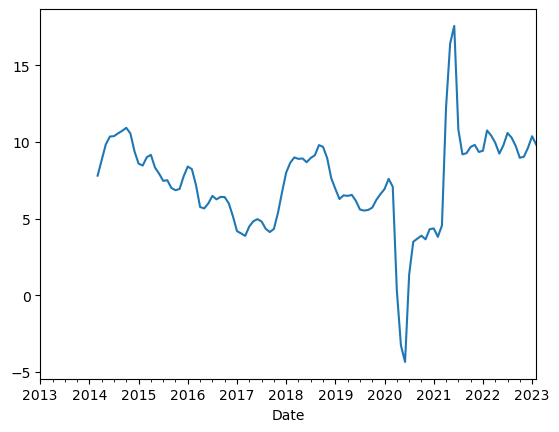

In [11]:
#Contractor Hours BLS
wages = pd.read_excel(wages_file, skiprows=12)
wages =wages.pivot_table(index='Year')
wages.reset_index(inplace=True)
wages = wages.melt(id_vars='Year', value_vars=wages.columns[1:], var_name='Month', value_name='Payroll')
wages['Date'] = pd.to_datetime(wages['Year'].astype(str)+'-'+wages['Month'].astype(str)+'-'+'1')
wages.set_index('Date', inplace=True)
wages = wages.sort_index()
wages.dropna(subset='Payroll', inplace=True)

wages['Payroll'] = wages.Payroll.rolling(3).mean()
wages['Payroll'] = wages.Payroll.pct_change(12) *100
wages['Payroll'].plot()
plt.show()

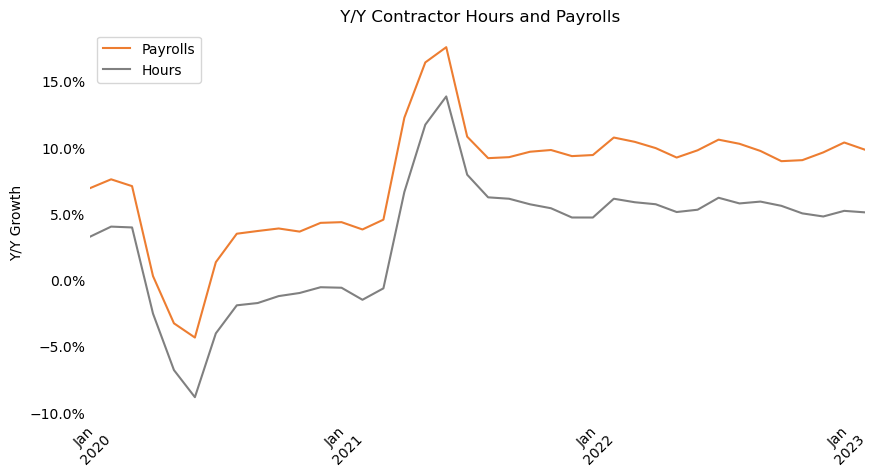

In [12]:
#combine both BLS data into one frame
assert len(wages) == len(hours)

bls = wages.copy()
bls = bls.merge(hours[['Hours']], how='inner', left_index=True, right_index=True)
assert len(bls)==len(wages)
bls = bls.dropna()

bls_exp = wb.sheets['BLS from Python']
wb.sheets['BLS from Python'].api.AutoFilter.ShowAllData()
bls_exp.range('A1').value=bls[['Hours', 'Payroll']]  / 100

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdate
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10,5))
ax = bls['Payroll'][bls.index >= '2020-01-01'].plot(style='#ED7D31', label='Payrolls')
bls['Hours'].loc[bls.index>='2020-01-01'].plot(ax=ax, style='grey', label='Hours')
legend = ax.legend(loc='upper left')
plt.xticks(bls.index[bls.index >= '2020-01-01'], rotation=45)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set(
    title=' Y/Y Contractor Hours and Payrolls',
    xlabel=None,
    ylabel='Y/Y Growth'
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

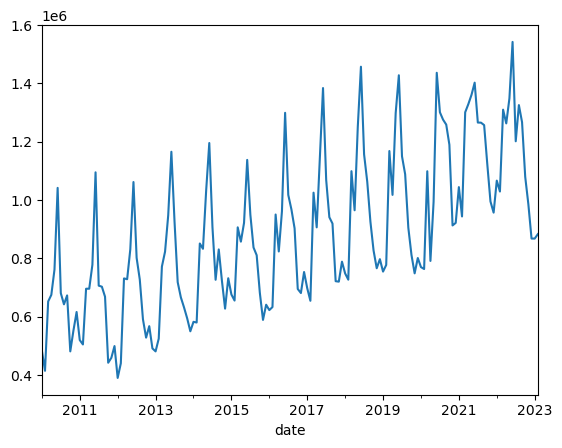

,year,month,res_wh_gas,res_wh_elec,comml_wh_gas,comml_wh_electric,gas_furnace,oil_furnace,furnace,ac,ashp,ac_ashp,resi_unitary,unitary,light_commercial,under 16.5,16.5 to 21.9,22 to 26.9,27 to 32.9,33 to 38.9,39 to 43.9,44 to 53.9,54 to 64.9,65 to 96.9,97 to 134.9,135 to 184.9,185 to 249.9,250 to 319.9,320 to 379.9,380 to 539.9,540 to 639.9,640 and over,int,season,3ma,yoy,yoy2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,January,329088,311618,6598,4120,169024,5609,174633,192982,116910,309892,475042,484525,9483,8302,22638,63573,51862,69765,24302,32606,27361,3600,2700,1663,744,301,135,111,82,147,1,-145074.318940,NaN,NaN,NaN
2010-02-01,2010,February,336478,311409,6923,4339,150869,3752,154621,154149,105836,259985,400671,414606,13935,6473,18911,51099,40500,52215,21649,29751,25452,5215,4235,2342,1073,491,186,150,117,126,2,-190521.202124,NaN,NaN,NaN
2010-03-01,2010,March,421303,383318,8476,5698,186963,3958,190921,298475,162971,461446,636275,652367,16092,12066,33771,91297,73960,100347,38231,53083,42599,6010,4721,2732,1347,500,226,191,165,200,3,30678.601445,6.188050e+05,NaN,NaN
2010-04-01,2010,April,357877,327445,6754,5574,149791,2167,151958,352451,170670,523121,658564,675079,16515,9012,43306,110332,84754,114145,42637,57931,44489,6400,4812,2816,1244,492,274,158,148,171,4,44749.930085,6.190482e+05,NaN,NaN
2010-05-01,2010,May,286002,285078,5939,4457,172876,2408,175284,396612,189854,586466,743497,761750,18253,9471,36999,116113,97101,133017,51321,71244,52947,6398,5400,3248,1694,705,252,195,161,200,5,119444.257892,6.314411e+05,NaN,NaN
2010-06-01,2010,June,389072,371533,7412,5432,229979,3597,233576,565322,243072,808394,1017834,1041970,24136,16743,54145,158001,129768,186732,68020,94236,76613,8636,7199,4458,1844,899,364,286,220,230,6,422170.651437,6.308114e+05,NaN,NaN
2010-07-01,2010,July,297218,288026,6896,5642,167113,3286,170399,358871,151696,510567,661175,680966,19791,16968,30012,95311,80427,110917,42852,61601,52688,7233,6092,3505,1514,669,267,208,150,153,7,46526.662842,6.321815e+05,NaN,NaN
2010-08-01,2010,August,308646,299048,5835,4573,199402,3636,203038,300046,139505,439551,622578,642589,20011,13881,24989,78580,62856,93845,38495,56505,50389,7373,5655,3795,1503,791,275,260,174,185,8,38568.850237,6.194196e+05,NaN,NaN
2010-09-01,2010,September,278165,276952,5658,5021,280097,9233,289330,252370,131551,383921,650792,673251,22459,7889,22919,63014,54589,83023,33377,50376,46275,8319,6020,4484,1740,830,308,318,189,251,9,14471.565768,6.324130e+05,NaN,NaN


In [37]:
#AHRI Data
ahri = pd.read_excel(ahri_file)
m_map = pd.DataFrame({'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                     'int': [1,2,3,4,5,6,7,8,9,10,11,12]})
m_map
ahri = ahri.merge(m_map, how='left', on='month')
ahri['date'] = pd.to_datetime(ahri.year.astype(str) + '-' + ahri.int.astype(str) + '-' '1')
ahri.set_index('date', inplace=True)

ahri.unitary.plot()
plt.show()

decomp = STL(ahri.unitary).fit()
season = pd.DataFrame(decomp.seasonal)
ahri = ahri.merge(season, how='left', on='date')
ahri['3ma'] = ahri.unitary - ahri['season']
ahri['3ma'] = ahri['3ma'].rolling(3).mean()
ahri['yoy'] = ahri['3ma'].pct_change(12) * 100
ahri['yoy2'] = ahri.unitary.pct_change(12) * 100
ahri